![matplotlib Logo](./images/matplotlib_logo.png)

- [Visualización con Matplotlib](#matplotlib)
    - [Elementos de una visualización](#elementos)
        - [Figura (`Figure`)](#figura)
        - [Paneles (`Axes`)](#paneles)
        - [Ejes (`Axis`)](#ejes)
        - [Componentes visuales (`Artist`)](#componentes)
    - [Dos interfaces por el precio de uno](#interfaces)
        - [Interfaz de estilo MATLAB](#interfaz_matlab)
        - [Interfaz orientada a objetos](#interfaz_oo)
    - [Gráficos de Lineas y puntos simples](#lineas)
        - [Colores y estilos](#estilos)
        - [Límites en los ejes](#limites)
        - [Etiquetado](#etiquetado)
        - [NOTAS](#notas)
    - [Gráficos de dispersión simples (Scatter Plots)](#dispersion)
        - [Scatter Plots con `plt.plot`](#plt_plot)
        - [Scatter Plots con `plt.scatter`](#plt_scatter)
    - [Diagramas de barras, áreas y tartas](#barras)
    - [Visualizando errores](#errores)
    - [Gráficas de densidad y contorno](#densidad)
        - [Visualizando una función tridimensional](#tridimensional)
    - [Histogramas](#histogramas)
    - [Histogramas bidimensionales e incrustaciones](#histogramas_bidimensionales)
    - [Personalizando leyendas](#leyendas)
    - [Figuras con múltiples gráficas](#graficas)
        - [`plt.axes`: subparcelas a mano](#plt_axes)
        - [`plt.subplot`: Cuadrículas simples](#plt_subplot)
        - [`plt.subplots`: Toda la cuadrícula en una operación](#plt_subplots)
        - [`plt.GridSpec`: cuadrículas complejas](#plt_gridspec)
    - [Textos y anotaciones](#anotaciones)
    - [Personalizando marcas (*Ticks*)](#marcas)
    - [Líneas del eje (*spines*)](#spines)
    - [Gráficos Tridimensionales](#tridimensionales)
- [Seaborn](#seaborn)
    - [Gráficos de tira](#tira)
    - [Gráficos de caja](#caja)
    - [Gráficos de enjambre](#enjambre)
    - [Gráficas conjuntas](#conjuntas)

___

<a id="matplotlib"></a>
# Visualización con Matplotlib
La visualización de datos es el proceso de interpretar los datos y presentarlos en un formato gráfico. La visualización de datos ayuda a las personas a comprender la importancia de los datos al resumir y presentar una gran cantidad de datos en un formato simple y fácil de entender para poder comunicar la información de manera clara y efectiva.

El lenguaje Python proporciona numerosas bibliotecas de visualización de datos. Las bibliotecas de visualización de datos más utilizadas y comunes son `Pygal`, `Altair`, `VisPy`, `PyQtGraph`, `Matplotlib`, `Bokeh`, `Seaborn`, `Plotly` y `ggplot`.

Cada una de estas bibliotecas tiene sus propias características. Algunas de estas bibliotecas dependen de otras bibliotecas. Por ejemplo, Seaborn es una biblioteca de visualización de datos estadísticos que utiliza Matplotlib. Además, necesita Pandas y quizás NumPy para el procesamiento estadístico antes de visualizar datos.

En el curso nos centraremos en la herramienta `Matplotlib` para la visualización en Python. Matplotlib es una biblioteca de visualización de datos multiplataforma construida sobre matrices NumPy y diseñada para trabajar con SciPy. Una de las características más importantes de Matplotlib es su capacidad para múltiples sistemas operativos y backends gráficos. Este enfoque multiplataforma, ha dado lugar a una gran base de usuarios, que a su vez ha dado lugar a una base de desarrolladores activa y a las poderosas herramientas y la ubicuidad de Matplotlib en el mundo científico de Python.

>Hay dos tipos de backends: backends de interfaz de usuario (para uso en pygtk, wxpython, tkinter, qt4 o macosx; también conocidos como "backends interactivos") y backends de copia dura para hacer archivos de imagen (PNG, SVG, PDF, PS; también conocido como "backends no interactivos").

Todo en `matplotlib` está organizado en una jerarquía. En la parte superior de la jerarquía se encuentra el "entorno de máquina de estado" que proporciona el módulo `matplotlib.pyplot` que trabaja de forma muy similar a `MATLAB`. En este nivel, las funciones simples se utilizan para agregar elementos de trazado (líneas, imágenes, texto, etc.) a los ejes actuales en la figura actual.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

El siguiente nivel en la jerarquía es el primer nivel de la interfaz orientada a objetos, en la cual `pyplot` se usa solo para unas pocas funciones, como la creación de figuras, y el usuario crea explícitamente y realiza un seguimiento de los objetos de figuras y ejes. En este nivel, el usuario utiliza pyplot para crear figuras y, a través de esas figuras, se pueden crear uno o más objetos de ejes. Estos objetos de ejes se utilizan para la mayoría de las acciones de trazado. Cada función pyplot realiza algún cambio en una figura: por ejemplo, crea una figura, crea un área de trazado en una figura, traza algunas líneas en un área de trazado, decora el trazado con etiquetas, etc.

En `matplotlib.pyplot`, se conservan varios estados en las llamadas a funciones, de modo que realiza un seguimiento de elementos como la figura actual y el área de trazado, y las funciones de trazado se dirigen a los ejes actuales (tenga en cuenta que "ejes" aquí y en la mayoría de los lugares en la documentación se refiere a la parte de ejes de una figura y no al término matemático estricto para más de un eje).

In [2]:
#'%matplotlib inline' visualiza la salida en Jupyter notebooks, modo interactivo
#'%matplotlib <backend>' visualiza la salida en una ventana, utilizando un backend específico
%matplotlib inline

<a id="elementos"></a>
## Elementos de una visualización
![matplotlib Anatomy](./images/matplotlib-anatomy.png)

<a id="figura"></a>
### Figura (`Figure`)

Se corresponde con toda la imagen anterior. La figura incluye todos los componentes secundarios o paneles incluidos en la misma (`Axes`), todos los parámetros "visuales" (títulos, leyendas de figuras, etc.) y el lienzo (*canvas*). Una figura puede tener cualquier número de paneles (`Axes`), pero para ser útil debe tener al menos uno. Los gráficos en matplotlib residen dentro de un objeto `Figure`. No se puede hacer un gráfico con una figura vacía, hay que crear uno o más paneles de tipo `Axes` usando `add_subplot` o `subplots`.

In [3]:
fig = plt.figure();  # figura vacía sin ejes-componentes

<Figure size 640x480 with 0 Axes>

En IPython, aparecerá una ventana de trazado vacía, pero en Jupyter no se mostrará nada hasta que usemos algunos comandos más. `plt.figure` tiene una serie de opciones; destacando, `figsize` que garantizará que la figura tenga un cierto tamaño y relación de aspecto si se guarda en el disco. 

<a id="paneles"></a>
### Paneles (`Axes`)

Son 'un gráfico', es decir, la región de la imagen con el espacio de datos. Una figura dada puede contener muchos `Axes`, pero un objeto `Axes` dado solo puede estar en una figura. Los `Axes` contienen dos (o tres en el caso de objetos 3D) `Axis` que se ocupan de los límites de datos (los límites de datos también se pueden controlar a través de `set_xlim` y `set_ylim`). Cada `Axes` tiene un título (establecido mediante `set_title`), una etiqueta-x (establecida mediante `set_xlabel`) y una etiqueta-y (establecida mediante `set_ylabel`). 

<a id="ejes"></a>
### Ejes (`Axis`)

Estos son objetos tipo línea de números. Se ocupan de establecer los límites del gráfico y generar las marcas de verificación (ticks) y sus etiquetas (ticklabel). La ubicación de los ticks está determinada por un localizador (`Locator`) y las cadenas de ticklabel están formateadas por un formateador (`Formatter`). La combinación del localizador y el formateador correctos proporciona un control muy preciso sobre las ubicaciones y las etiquetas de ticks.

<a id="componentes"></a>
### Componentes visuales (`Artist`)

Básicamente, todo lo que puede ver en la figura. Esto incluye objetos de texto, objetos de Line2D, objetos de colección, objetos de parches... Cuando se representa la figura, todos los componentes visuales se dibujan en el lienzo. La mayoría de estos componentes están vinculados a un `Axes` no puediendo ser compartido por varios, ni moverse de uno a otro.

<a id="interfaces"></a>
## Dos interfaces por el precio de uno
Una característica potencialmente confusa de Matplotlib es su doble interfaz: una interfaz basada en estilo MATLAB y una interfaz más potente orientada a objetos. Aquí destacaremos rápidamente las diferencias entre los dos.

<a id="interfaz_matlab"></a>
### Interfaz de estilo MATLAB
Matplotlib se escribió originalmente como una alternativa de Python para los usuarios de MATLAB, y gran parte de su sintaxis refleja ese hecho. Las herramientas de estilo MATLAB están contenidas en la interfaz pyplot (plt).

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

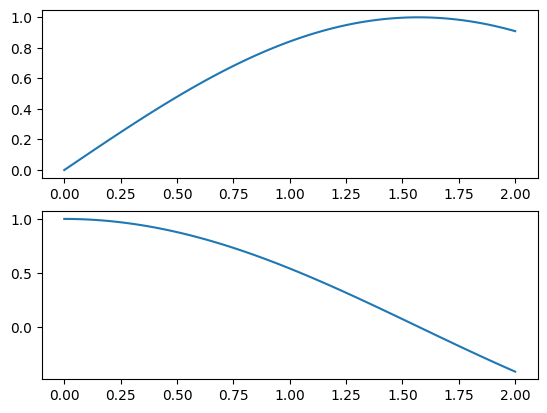

In [5]:
# creamos una figura
plt.figure() 
# crea el primer panel  
plt.subplot(2, 1, 1) # (filas, columnas, número de panel) 
plt.plot(x, np.sin(x))
# crea el segundo panel 
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Es importante tener en cuenta que esta interfaz es de estado, es decir, realiza un seguimiento de la figura y los ejes "actuales", que son donde se aplican todos los comandos `plt`. Se puede obtener una referencia a éstos utilizando las rutinas `plt.gcf` (obtener la figura actual) y `plt.gca` (obtener los ejes actuales).

>**Nota**: En este modo, Cuando emite un comando como `plt.plot` matplotlib dibuja sobre la última figura y componente gráfico o panel utilizado (creando uno si es necesario).

Si bien esta interfaz con estado es rápida y conveniente para diagramas simples, es fácil encontrar problemas. Por ejemplo, una vez que se crea el segundo panel, ¿cómo podemos retroceder y agregar algo al primero?

<a id="interfaz_oo"></a>
### Interfaz orientada a objetos
La interfaz orientada a objetos está disponible para estas situaciones más complicadas y para cuando desee más control sobre su figura. En lugar de depender de alguna noción de una figura o ejes "activos", en la interfaz orientada a objetos, las funciones de trazado son métodos de objetos explícitos de figuras y ejes.

>**NOTA**: En Jupyter notebooks en modo interfaz OO, los gráficos se restablecen después de evaluar cada celda, por lo que para gráficos complejos se deben colocar todos los comandos de trazado en una sola celda.

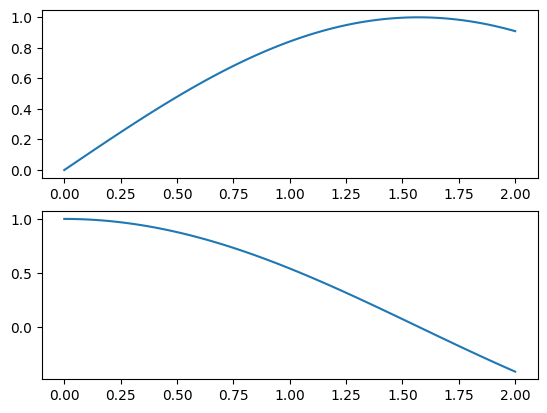

In [6]:
# Primero creamos un gris de paneles
# 'ax' es un array con los dos paneles (Axes) de la figura, 
fig, ax = plt.subplots(2)
# Lalamamos al método 'plot' en los objetos apropiados
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

<a id="lineas"></a>
## Gráficos de Lineas y puntos simples
Quizás el más simple de todos los gráficos es la visualización de una sola función `y = f(x)`. Aquí vamos a echar un vistazo a la creación de una trama simple de este tipo.

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


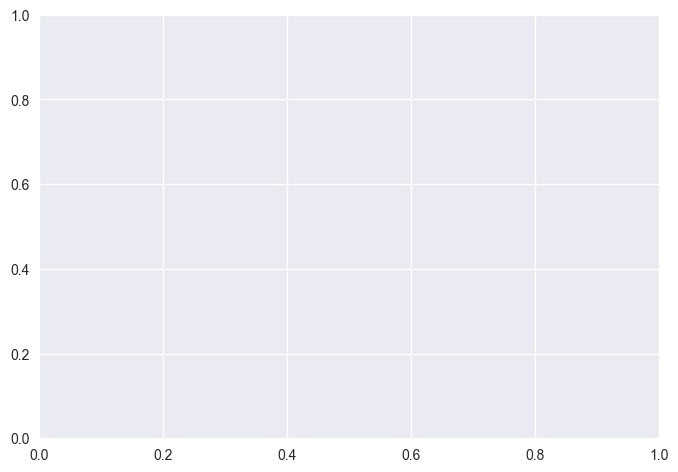

In [15]:
# existen múltiples estilos visuales que se pueden aplicar
# Configura el estilo de matplotlib
plt.style.use('seaborn-v0_8')  # Verifica que el estilo esté disponible

plt.figure()
plt.axes();

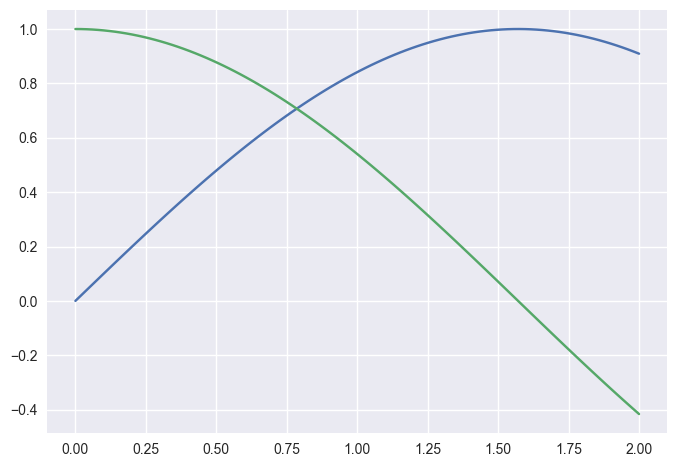

In [16]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

<a id="estilos"></a>
### Colores y estilos
Si no se especifica ningún color, Matplotlib recorrerá automáticamente un conjunto de colores predeterminados para varias líneas.

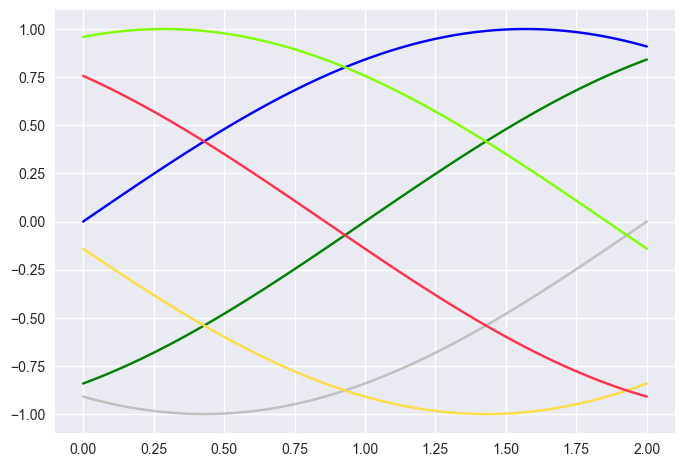

In [17]:
# colores
plt.plot(x, np.sin(x - 0), color='blue')        # nombre de color
plt.plot(x, np.sin(x - 1), color='g')           # código corto (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # escala de grises entre 0 y 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # RGB hexadecimal (de 00 a ff)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # Tupla RGB (valores entre 0 y 1)
plt.plot(x, np.sin(x - 5), color='chartreuse');  # colores HTML 

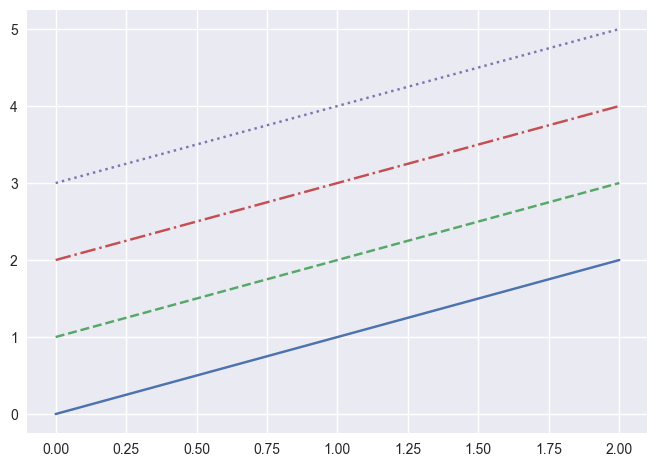

In [18]:
plt.plot(x, x + 0, linestyle='solid')   # linestyle='-'
plt.plot(x, x + 1, linestyle='dashed')  # linestyle='--'
plt.plot(x, x + 2, linestyle='dashdot') # linestyle='-.'
plt.plot(x, x + 3, linestyle='dotted');  # linestyle=':'

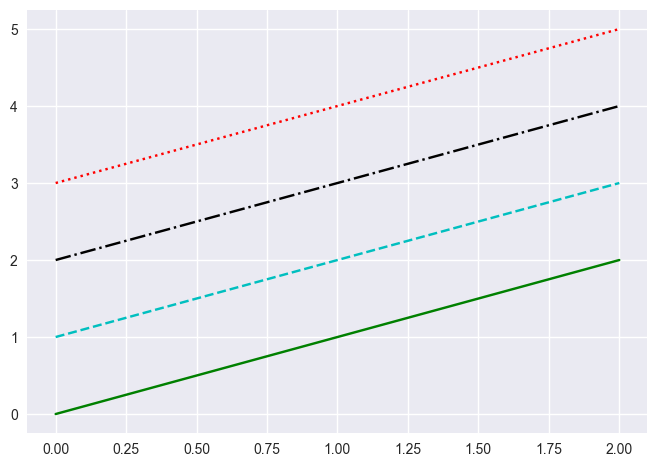

In [19]:
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red

<a id="limites"></a>
### Límites en los ejes
Matplotlib hace un trabajo decente al elegir los límites de ejes predeterminados para su trazado, pero a veces es bueno tener un control más preciso.

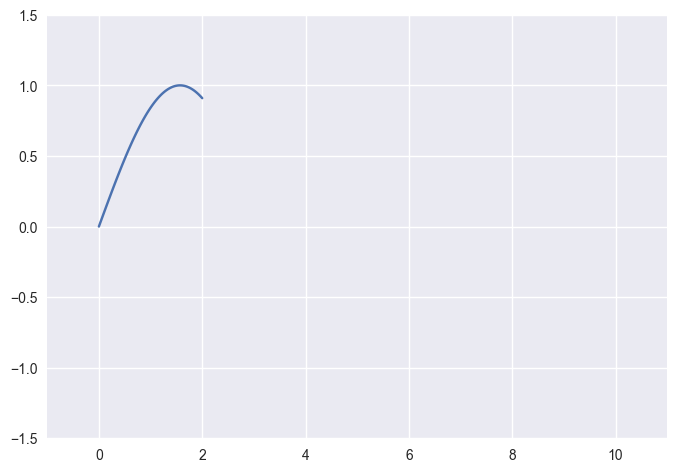

In [20]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);
# equivalente a 'plt.axis([-1, 11, -1.5, 1.5])'

El método 'plt.axis' va incluso más allá de esto, lo que le permite hacer cosas como ajustar automáticamente los límites alrededor de la trama actual o asegurar una relación de aspecto igual para que en la pantalla, una unidad en x sea igual a una unidad en y:

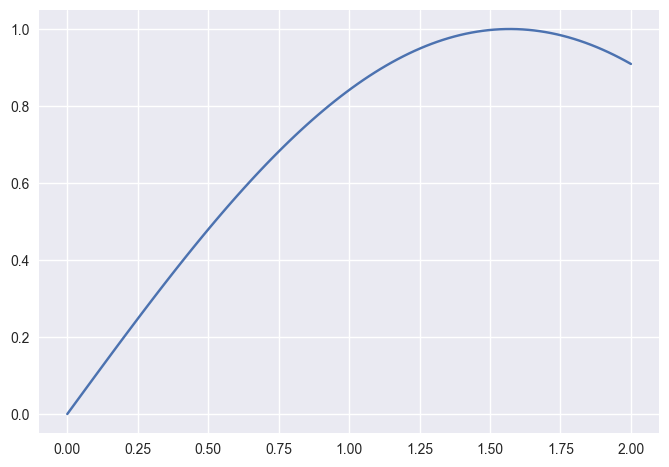

In [21]:
plt.plot(x, np.sin(x))
plt.axis('tight');

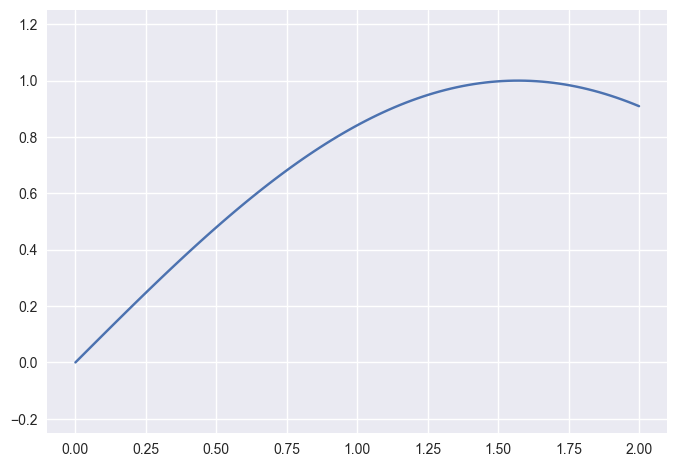

In [22]:
plt.plot(x, np.sin(x))
plt.axis('equal');

<a id="etiquetado"></a>
### Etiquetado
Como la última parte de esta sección, veremos brevemente el etiquetado de los gráficos: títulos, etiquetas de ejes y leyendas simples. Los títulos y las etiquetas de los ejes son las más simples; existen métodos que se pueden usar para configurarlos rápidamente. Se puede ajustar la posición, el tamaño y el estilo de estas etiquetas usando argumentos opcionales para la función.

In [23]:
import pandas as pd
dataset = pd.read_csv("./data/Salaries.csv")
phd = dataset['phd']
service = dataset['service']
salary = dataset['salary']
dataset.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


Cuando se muestran varias líneas dentro de un solo eje, puede ser útil crear una leyenda de trazado que marque cada tipo de línea.

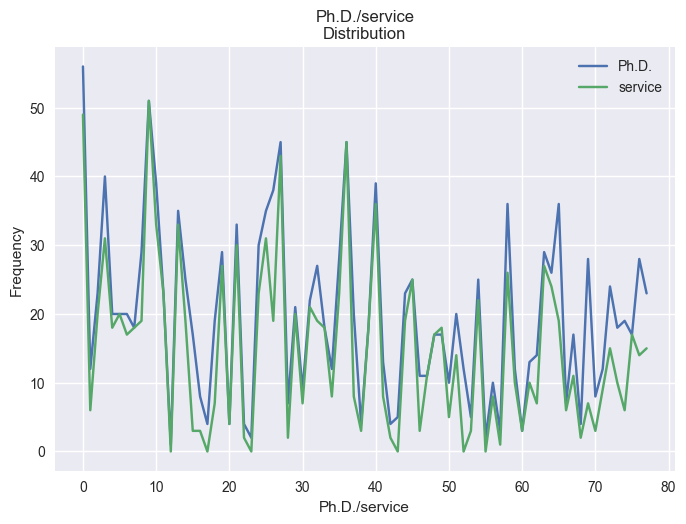

In [24]:
plt.plot(phd, label='Ph.D.')
plt.plot(service, label='service')
plt.xlabel('Ph.D./service')
plt.ylabel('Frequency')
plt.title('Ph.D./service\nDistribution')
plt.legend();

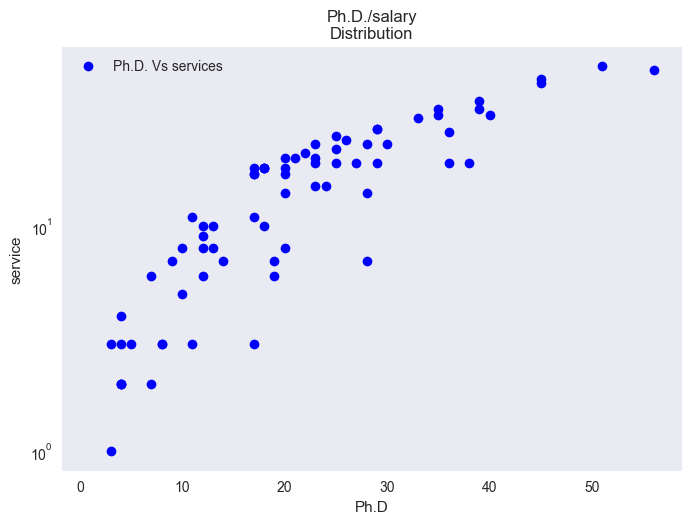

In [25]:
plt.plot(phd, service, 'bo', label="Ph.D. Vs services", lw=10)
plt.grid()
plt.legend()
plt.xlabel('Ph.D')
plt.ylabel('service')
plt.title('Ph.D./salary\nDistribution')
plt.yscale('log')

<a id="notas"></a>
### NOTAS
Si bien la mayoría de las funciones `plt` se traducen directamente a métodos `ax` (como plt.plot () → ax.plot (), plt.legend () → ax.legend (), etc.), este no es el caso de todos los comandos. En particular, las funciones para establecer límites, etiquetas y títulos se modifican ligeramente. Para realizar la transición entre las funciones de estilo MATLAB y los métodos orientados a objetos, realice los siguientes cambios:
- plt.xlabel () → ax.set_xlabel () 
- plt.ylabel () → ax.set_ylabel () 
- plt.xlim () → ax.set_xlim ()
- plt.ylim () → ax.set_ylim ()
- plt.title () → ax.set_title ()

<a id="dispersion"></a>
## Gráficos de dispersión simples (Scatter Plots)
Otro tipo de gráfico utilizado comúnmente es el gráfico de dispersión simple, un primo cercano de la línea de trazado. En lugar de unir puntos por segmentos de línea, aquí los puntos se representan individualmente con un punto, un círculo u otra forma.

<a id="plt_plot"></a>
### Scatter Plots con `plt.plot`
La flexibilidad en la función plt.plot permite una amplia variedad de opciones de visualización posibles.

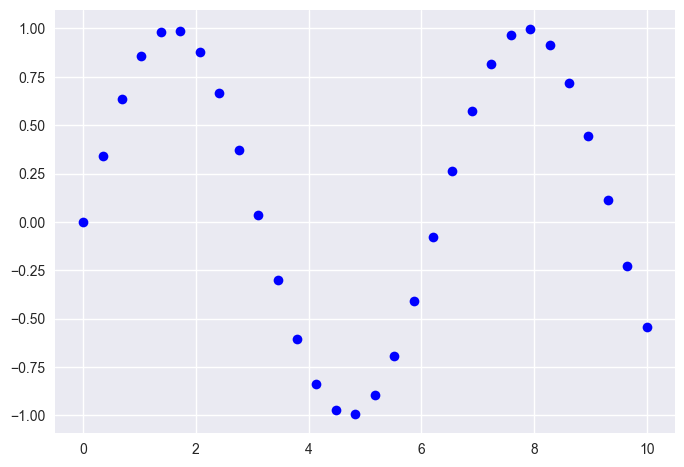

In [26]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='blue');

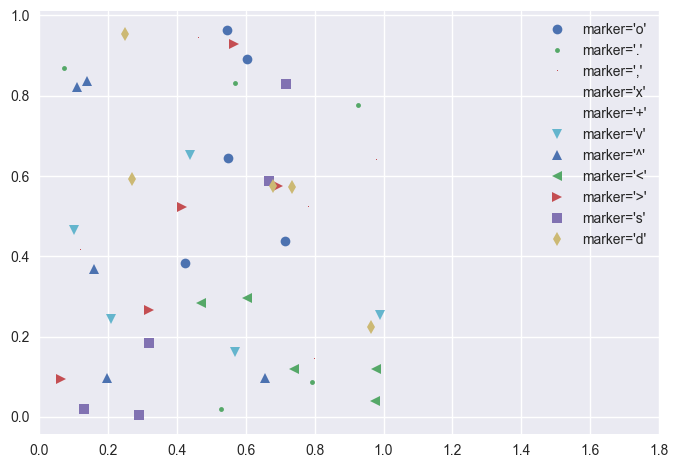

In [27]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8);

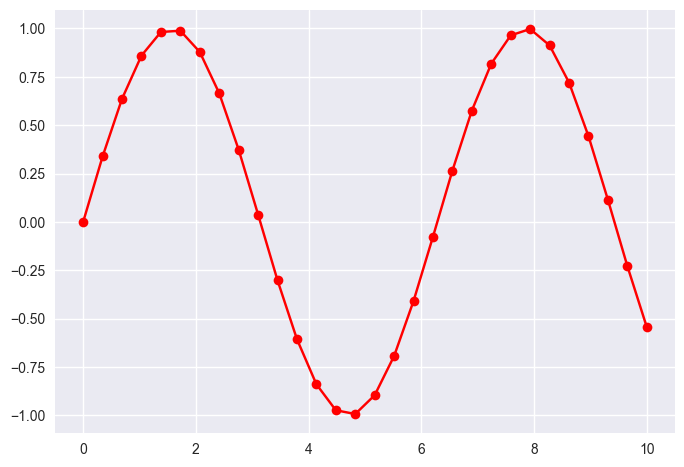

In [28]:
plt.plot(x, y, '-or');

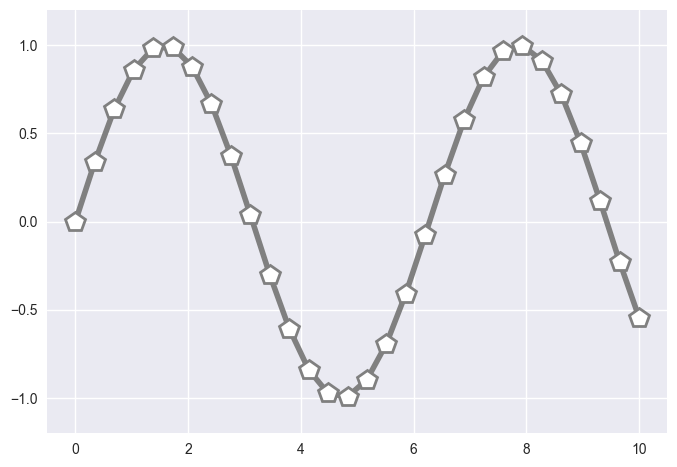

In [29]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

<a id="plt_scatter"></a>
### Scatter Plots con `plt.scatter`
Un segundo método, más potente para crear diagramas de dispersión es la función `plt.scatter`. La diferencia principal entre `plt.scatter` y `plt.plot` es que se puede usar para crear diagramas de dispersión donde las propiedades de cada punto individual (tamaño, color de cara, color de borde, etc.) se pueden controlar individualmente o asignar a los datos.

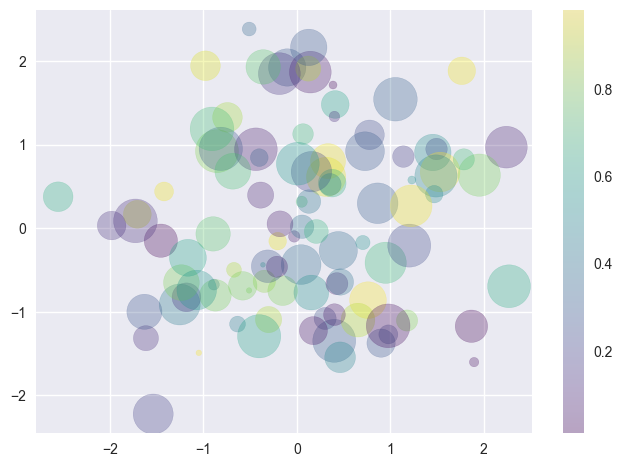

In [30]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # muestra la escala de color

> **Nota**: Para conjuntos de datos grandes, la diferencia entre estos dos métodos puede llevar a un rendimiento muy diferente, y por esta razón, `plt.plot` debería preferirse a `plt.scatter` para conjuntos de datos grandes.

La siguiente tabla muestra las posibles marcas que se pueden utilizar:  

|marca|descripción|marca|descripción|marca|descripción|marca|descripción|
|---|---|---|---|---|---|---|---|
|"."|point|"+"|plus|","|pixel|"x"|cross|
|"o"|circle|"D"|diamond|"d"|thin_diamond|		
|"8"|octagon|"s"|square|"p"|pentagon|"\*"|star|
|"\|"|vertical line|"\_"|horizontal line|"h"|hexagon1|"H"|hexagon2|
|0|tickleft|4|caretleft|"<"|triangle_left|"3"|tri_left|
|1|tickright|5|caretright|">"|triangle_right|"4"|tri_right|
|2|tickup|6|caretup|"^"|triangle_up|"2"|tri_up|
|3|tickdown|7|caretdown|"v"|triangle_down|"1"|tri_down|
|"None"|mothing|None|default|" "|nothing|""|nothing|


<a id="barras"></a>
## Diagramas de barras, áreas y tartas
Los diagramas de barras son uno de los tipos de parcelas más comunes. El método ax.bar (...) de Matplotlib también puede trazar rectángulos generales, pero el valor predeterminado está optimizado para una secuencia simple de valores x, y, donde los rectángulos tienen un ancho constante. También está ax.barh (...) (para horizontal), que hace una suposición de altura constante en lugar de una suposición de ancho constante.

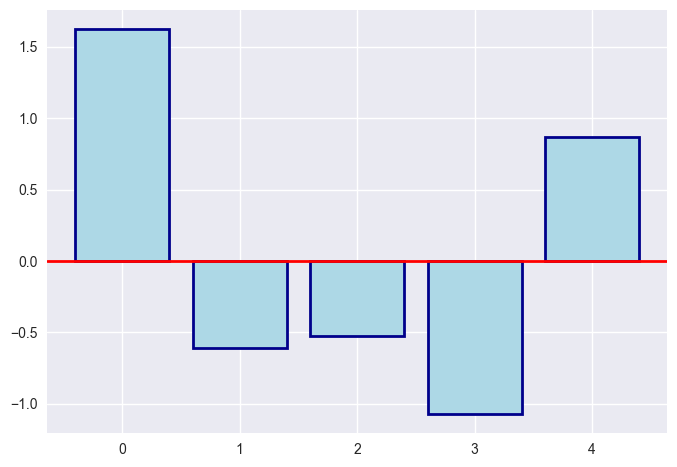

In [31]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)
plt.bar(x, y, color='lightblue', align='center', edgecolor='darkblue', linewidth=2)
plt.axhline(0, color='red', linewidth=2)
plt.grid(True);

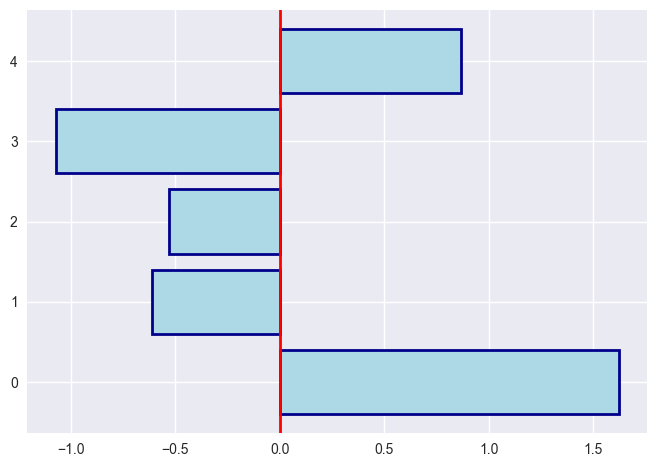

In [32]:
plt.barh(x, y, color='lightblue', align='center', edgecolor='darkblue', linewidth=2)
plt.axvline(0, color='red', linewidth=2)
plt.grid(True);

Dentro de las funciones dedicadas a deibujar áreas o regiones están `fill`, `fill_between` o `stackplot`. De estas funciones, `fill_between` es probablemente la más utilizada. En su forma más básica, se llena entre los valores de y dados y 0:

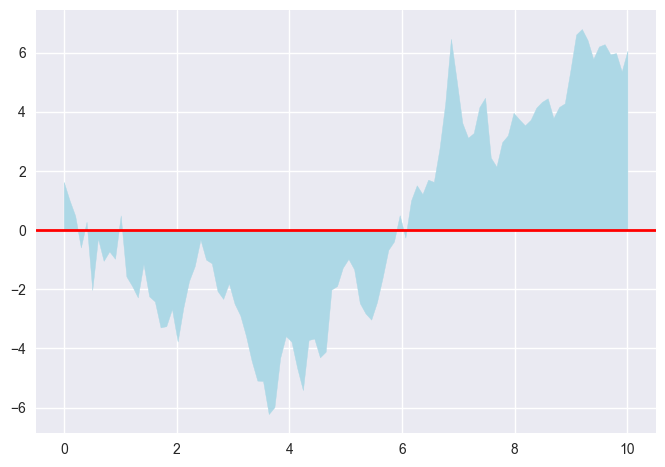

In [33]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)
plt.fill_between(x, y, color='lightblue')
plt.axhline(0, color='red', linewidth=2);

Sin embargo, también se puede utilizar para rellenar entre dos curvas. Esto es particularmente útil cuando desea mostrar un envoltorio de algún tipo (por ejemplo, error, confianza, amplitud, etc.).

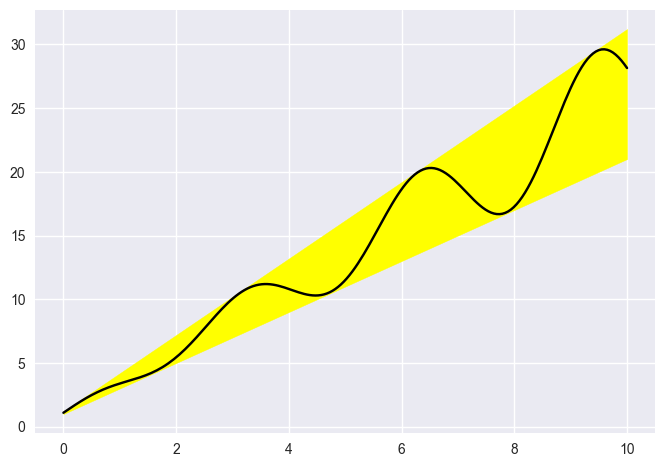

In [34]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

# dibuja el envoltorio `fill_between`
plt.fill_between(x, y1, y2, color='yellow')
# dibuja la línea
plt.plot(x, y_mean, color='black');

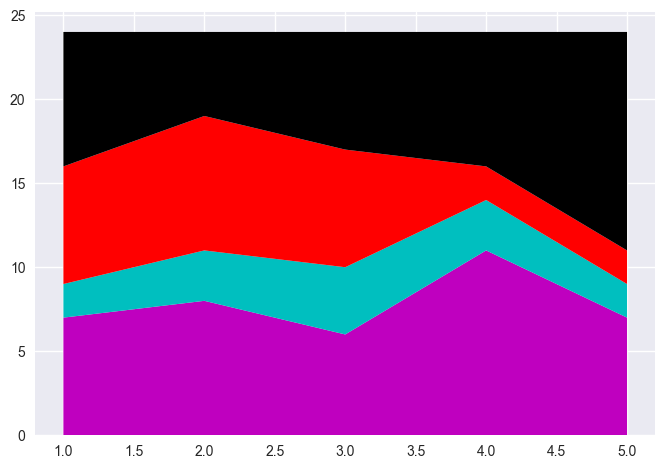

In [35]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing = [8,5,7,8,13]
plt.stackplot(days, sleeping, eating, working, playing, colors=['m','c', 'r', 'k']);

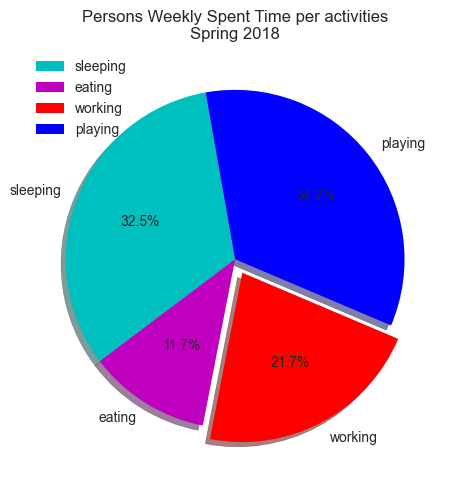

In [36]:
slices = [39,14,26,41]
activities = ['sleeping', 'eating', 'working', 'playing']
cols = ['c','m','r', 'b','g']
plt.pie(slices,
        labels= activities,
        colors= cols,
        startangle=100,
        shadow=True,
        explode = (0.0,0.0,0.09,0),
        autopct = '%1.1f%%')
plt.title('Persons Weekly Spent Time per activities\nSpring 2018')
plt.legend();

<a id="errores"></a>
## Visualizando errores
En la visualización de datos y resultados, mostrar los errores de manera efectiva puede hacer que un gráfico transmita información mucho más completa. Se puede crear una barra de errores básica con una sola llamada a una función Matplotlib.

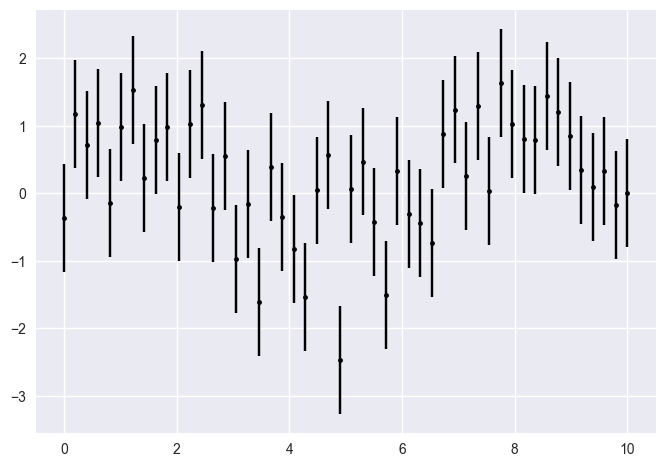

In [37]:
x = np.linspace(0, 10, 50) 
dy=0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

Además de estas opciones básicas, la función `errorbar` tiene muchas opciones para ajustar su salida. Usando estas opciones adicionales puede personalizar fácilmente la estética de su gráfico de barra de errores.

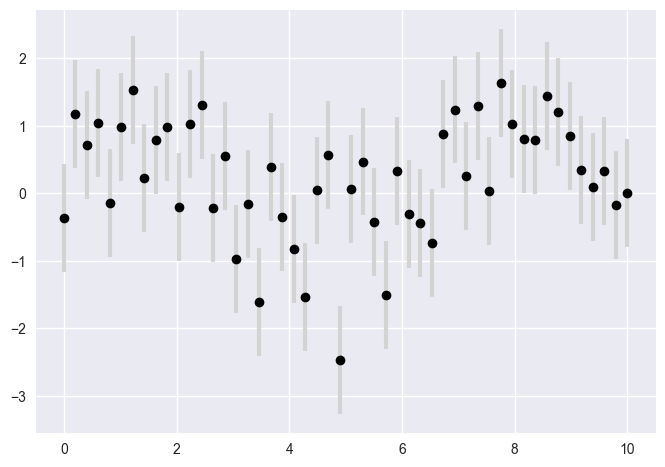

In [38]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

<a id="densidad"></a>
## Gráficas de densidad y contorno
A veces es útil mostrar datos tridimensionales en dos dimensiones utilizando contornos o regiones codificadas por colores. Existen tres funciones de Matplotlib que pueden ser útiles para esta tarea: `plt.contour` para trazados de contorno, `plt.contourf` para trazados de contorno rellenos y `plt.imshow` para mostrar imágenes. 

<a id="tridimensional"></a>
### Visualizando una función tridimensional
Comenzaremos mostrando una gráfica de contorno usando una función 'z = f(x, y)', usando la siguiente opción en particular para f:

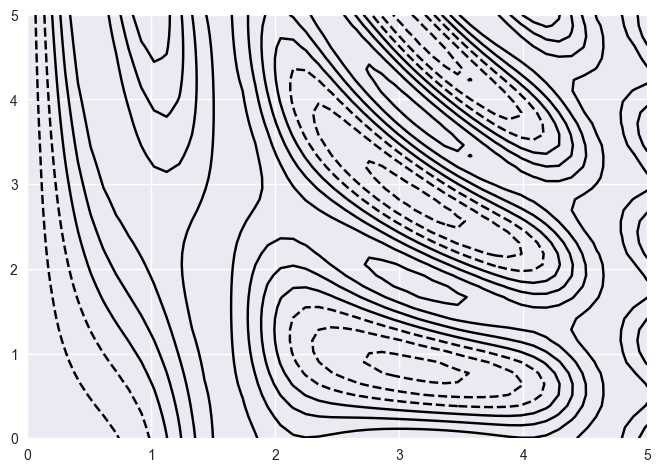

In [39]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) 
Z = f(X,Y)

plt.contour(X, Y, Z, colors='black');

>De forma predeterminada, cuando se utiliza un solo color, los valores negativos se representan con líneas discontinuas y los valores positivos con líneas continuas.

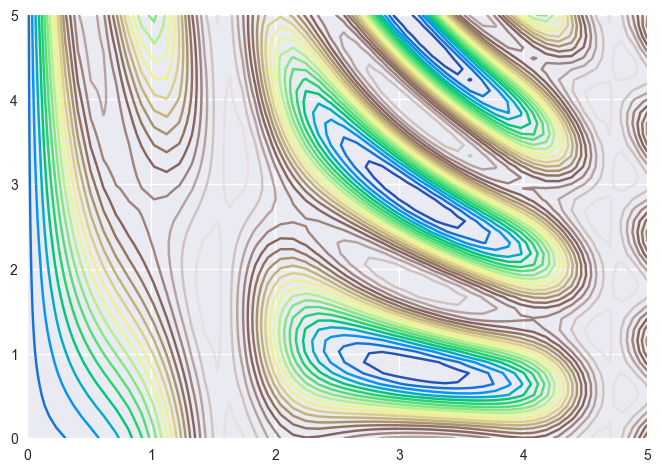

In [40]:
# 'cmap' es un mapa de color disponible en 'plt.cm'
plt.contour(X, Y, Z, 20, cmap='terrain');

Nuestra trama se ve mejor, pero los espacios entre las líneas pueden distraer un poco. Podemos cambiar esto cambiando a una gráfica de contorno lleno usando la función `plt.contourf`.

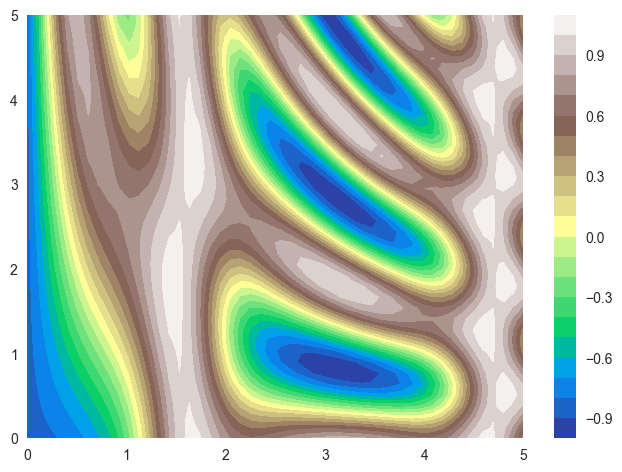

In [41]:
plt.contourf(X, Y, Z, 20, cmap='terrain')
plt.colorbar();

Un problema potencial con esta trama es que es poco "nítida". Es decir, los pasos de color son discretos en lugar de continuos, que no siempre es lo que se desea. Se podría remediar esto estableciendo el número de contornos en un número muy alto, pero esto resulta en una gráfica bastante ineficiente, ya que Matplotlib debe representar un nuevo polígono para cada paso en el nivel. Una mejor manera de manejar esto es usar la función `plt.imshow` que interpreta una cuadrícula bidimensional de datos como una imagen.

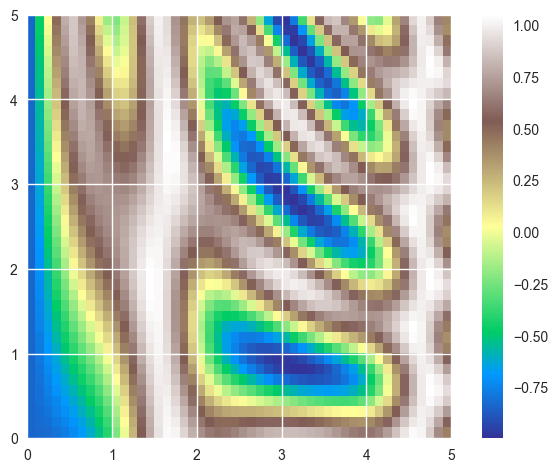

In [44]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='terrain')
plt.colorbar()

Finalmente, a veces puede ser útil combinar gráficos de contorno y gráficos de imagen.

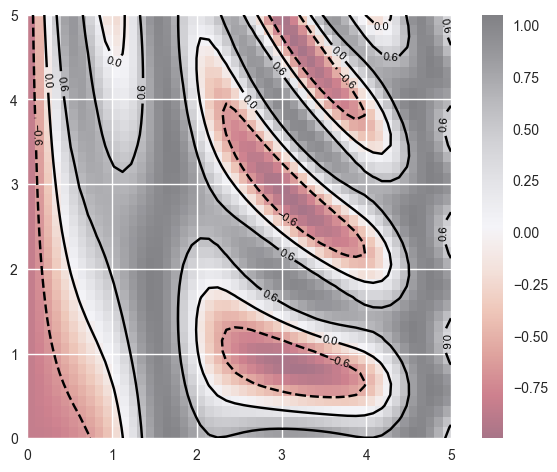

In [45]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

<a id="histogramas"></a>
## Histogramas
Un simple histograma puede ser un gran primer paso para entender un conjunto de datos. La función `hist` tiene muchas opciones para ajustar tanto el cálculo como la pantalla.

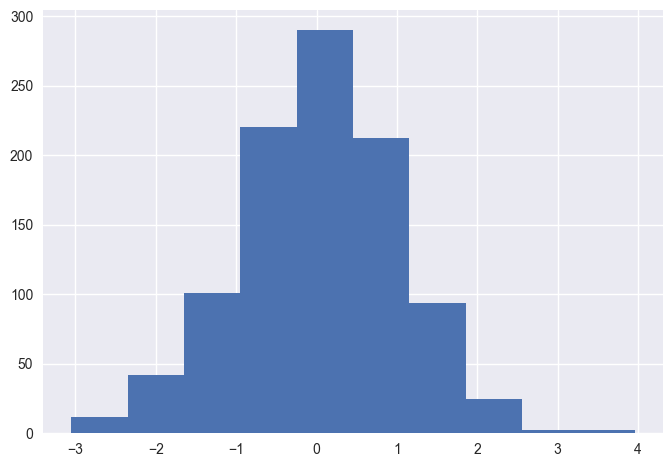

In [46]:
data = np.random.randn(1000)
plt.hist(data);

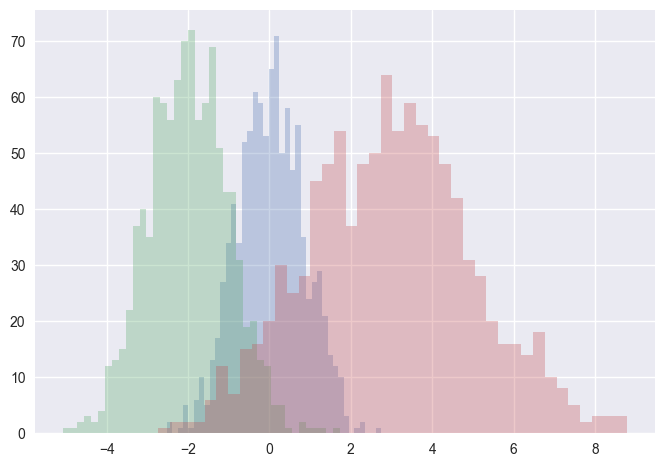

In [47]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

<a id="histogramas_bidimensionales"></a>
## Histogramas bidimensionales e incrustaciones
Al igual que creamos histogramas en una dimensión al dividir la línea numérica en contenedores, también podemos crear histogramas en dos dimensiones al dividir los puntos entre contenedores bidimensionales. 

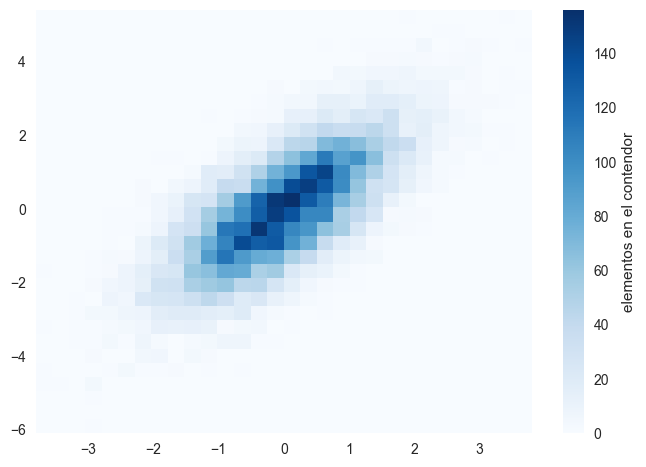

In [48]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('elementos en el contendor');

El histograma bidimensional crea una teselación de cuadrados a través de los ejes. Otra forma natural para tal teselación es el hexágono regular.

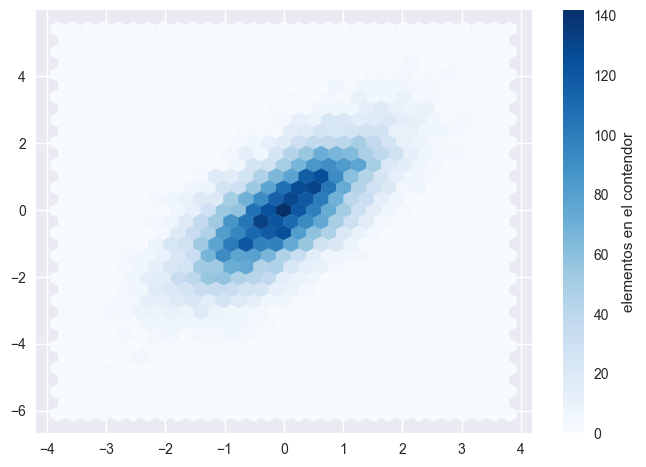

In [49]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
plt.colorbar(label='elementos en el contendor');

<a id="leyendas"></a>
## Personalizando leyendas
Las leyendas de la trama dan significado a una visualización, asignando etiquetas a los diversos elementos de la trama. Anteriormente vimos cómo crear una leyenda simple; Aquí echaremos un vistazo a la ubicación y estética de la leyenda en Matplotlib.

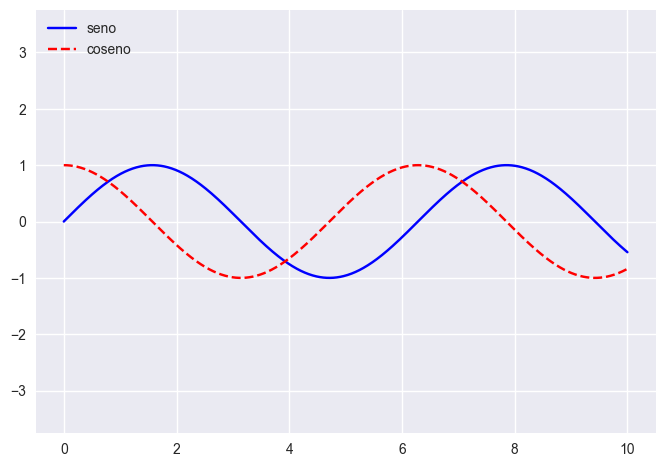

In [50]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), '-b', label='seno')
plt.plot(x, np.cos(x), '--r', label='coseno')
plt.axis('equal')
plt.legend(loc='upper left', frameon=False);

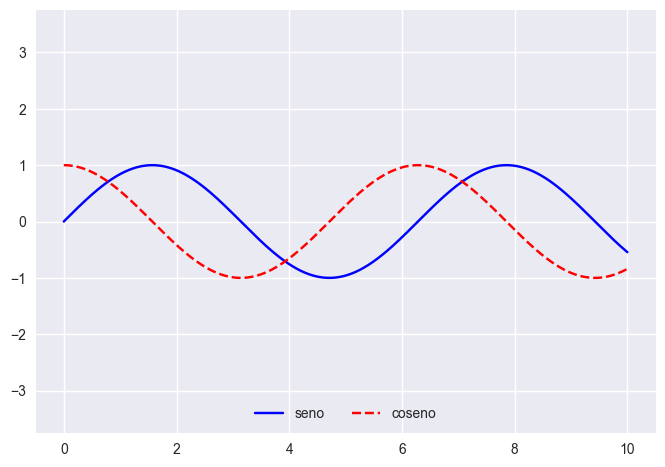

In [51]:
plt.plot(x, np.sin(x), '-b', label='seno')
plt.plot(x, np.cos(x), '--r', label='coseno')
plt.axis('equal')
plt.legend(frameon=False, loc='lower center', ncol=2);

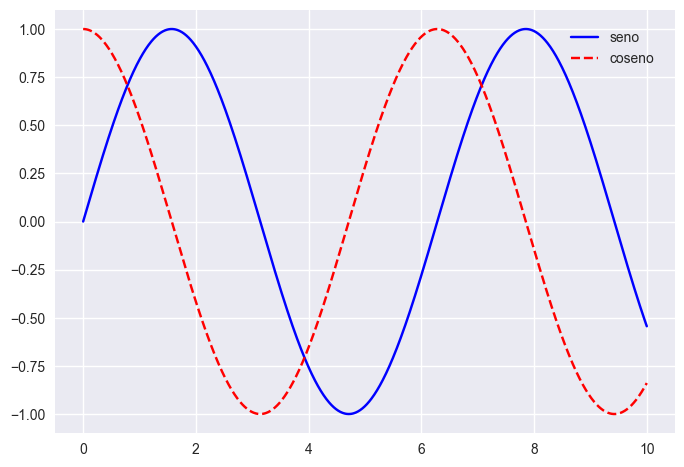

In [52]:
plt.plot(x, np.sin(x), '-b', label='seno')
plt.plot(x, np.cos(x), '--r', label='coseno')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='upper right');

<a id="graficas"></a>
## Figuras con múltiples gráficas
A veces es útil comparar diferentes vistas de datos en paralelo. Para este fin, Matplotlib tiene el concepto de subparcelas: grupos de ejes más pequeños que pueden existir juntos dentro de una sola figura. Estas subparcelas pueden ser inserciones, cuadrículas de parcelas u otros diseños más complicados. 

<a id="plt_axes"></a>
### `plt.axes`: subparcelas a mano
El método más básico para crear ejes es utilizar la función `plt.axes`. Como hemos visto anteriormente, por defecto, esto crea un objeto de ejes estándar que llena toda la figura. `plt.axes` también toma un argumento opcional que es una lista de cuatro números en el sistema de coordenadas de la figura. Estos números representan `[abajo, izquierda, ancho, altura]` en el sistema de coordenadas de la figura, que varía de 0 en la parte inferior izquierda de la figura a 1 en la parte superior derecha de la figura.

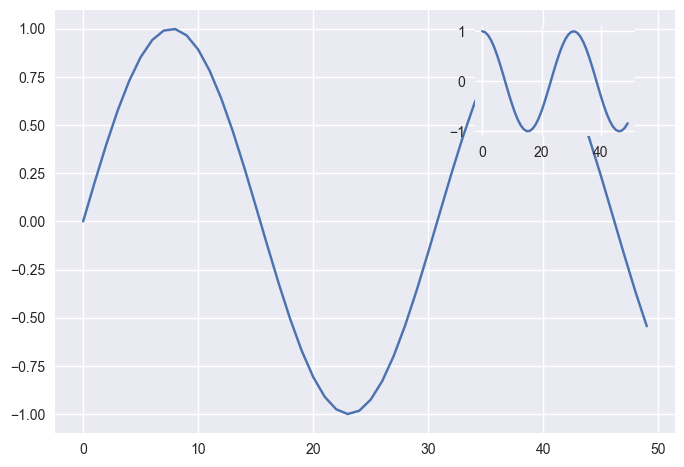

In [53]:
x = np.linspace(0, 10)
ax1 = plt.axes() # estandard
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

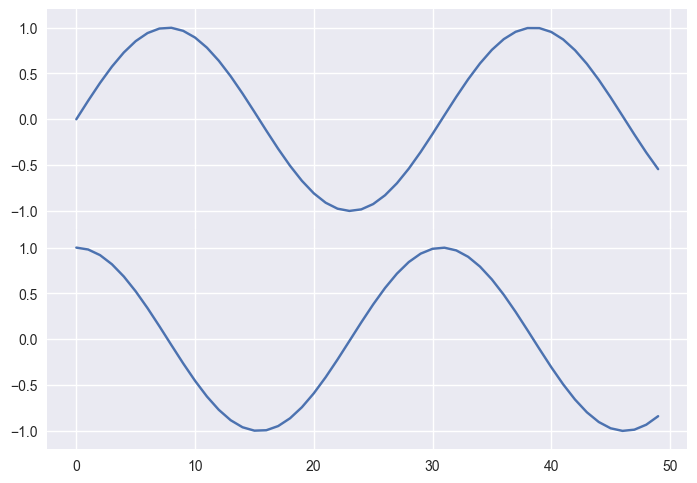

In [54]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

<a id="plt_subplot"></a>
### `plt.subplot`: Cuadrículas simples
La creación de cuadrículas de subparcelas son una necesidad bastante común de que Matplotlib. En el nivel más sencillo está `plt.subplot`, que crea una única subparcela dentro de una cuadrícula. Como se puede ver, este comando toma tres argumentos enteros: el número de filas, el número de columnas y el índice de la gráfica que se creará en este esquema, que se extiende desde la parte superior izquierda hasta la parte inferior derecha.

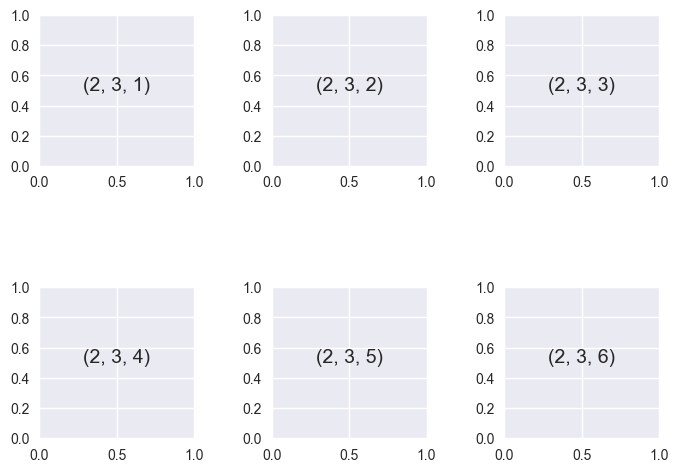

In [55]:
# ajusta el espaciado entre subparcelas
plt.subplots_adjust(hspace=0.8, wspace=0.5)
for i in range(1, 7): 
    # crea una subparcela
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=14, ha='center');

<a id="plt_subplots"></a>
### `plt.subplots`: Toda la cuadrícula en una operación
El enfoque que acabamos de describir puede volverse bastante tedioso cuando está creando una gran cuadrícula de subparcelas, especialmente si desea ocultar las etiquetas de los ejes x e y en las parcelas internas. Para este propósito, `plt.subplots` es la herramienta más fácil de usar. En lugar de crear una única subparcela, esta función crea una cuadrícula completa de subparcelas en una sola línea, devolviéndolas en una matriz NumPy. Los argumentos son el número de filas y el número de columnas, junto con las palabras clave opcionales sharex y sharey, que le permiten especificar las relaciones entre los diferentes ejes.

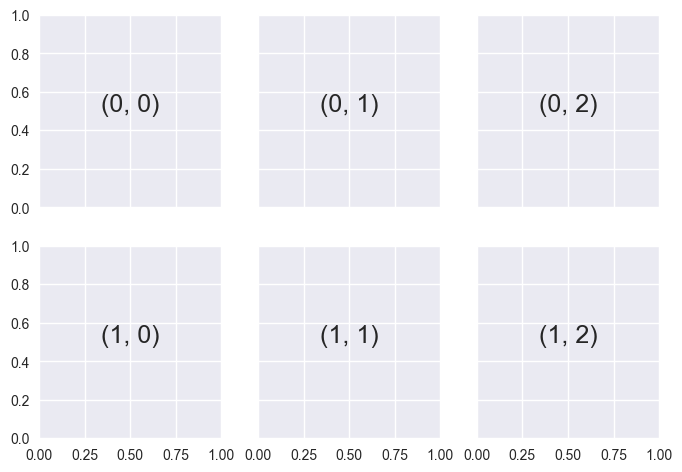

In [56]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row');
# los ejes se devuelven en un array de dos dimensiones, indexeado por [filas, columna] 
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center');

<a id="plt_gridspec"></a>
### `plt.GridSpec`: cuadrículas complejas
Para ir más allá de una cuadrícula normal a las subparcelas que abarcan varias filas y columnas, `plt.GridSpec` es la mejor herramienta. Este objeto no crea un gráfico por sí mismo; es simplemente una interfaz que es reconocida por el comando `plt.subplot`.

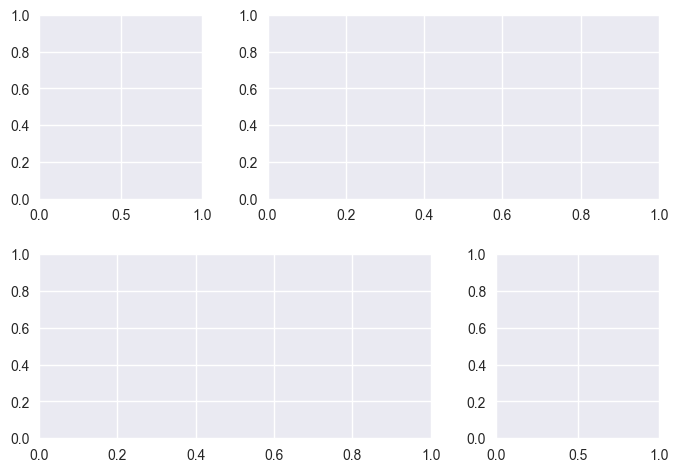

In [57]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

<a id="anotaciones"></a>
## Textos y anotaciones
Crear una buena visualización implica guiar al lector para que la figura cuente una historia. En algunos casos, esta historia se puede contar de una manera totalmente visual, sin la necesidad de agregar texto, pero en otros, se necesitan pequeñas indicaciones y etiquetas textuales. Quizás los tipos más básicos de anotaciones que usará son las etiquetas de los ejes y los títulos, pero las opciones van más allá de esto. 

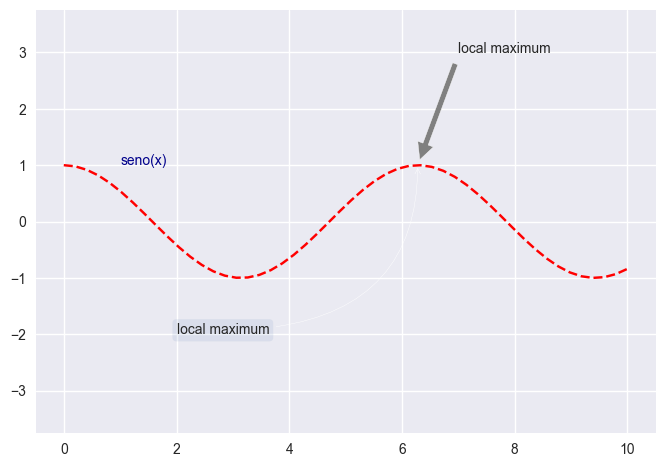

In [58]:
plt.plot(x, np.cos(x), '--r', label='coseno')
plt.axis('equal');
style = dict(size=10, color='darkblue', ha='left')
plt.text(1, 1, "seno(x)", **style)
plt.annotate('local maximum', xy=(6.28, 1), xytext=(7, 3), arrowprops=dict(facecolor='gray', shrink=0.05))
plt.annotate('local maximum', xy=(6.28, 1), xytext=(2, -2),
                       bbox=dict(boxstyle="round", alpha=0.1),
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

Cualquier marco de visualización de gráficos necesita algún esquema para traducir entre sistemas de coordenadas. Por ejemplo, un punto de datos en x, y = 1, 1 debe representarse de alguna manera en una determinada ubicación en la figura, que a su vez debe representarse en píxeles en la pantalla. Matemáticamente, tales transformaciones de coordenadas son relativamente sencillas, y Matplotlib tiene un conjunto bien desarrollado de herramientas que utiliza internamente para realizarlas.

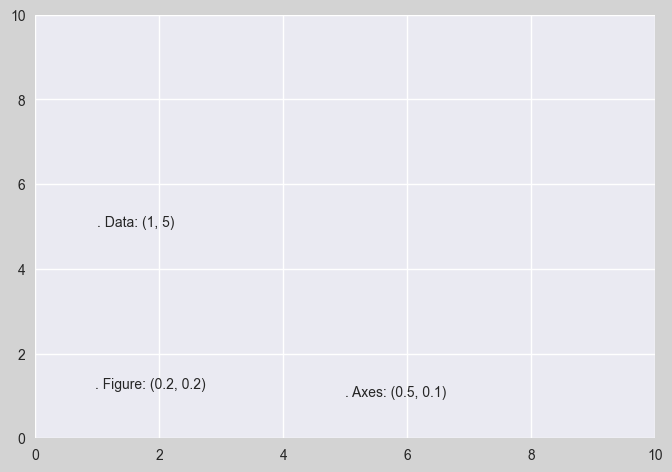

In [59]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

<a id="marcas"></a>
## Personalizando marcas (*Ticks*)
Los localizadores y formateadores predeterminados de matplotlib están diseñados para ser generalmente suficientes en muchas situaciones comunes, pero de ninguna manera son óptimos para todos los gráficos.

Cada eje tiene atributos `xaxis` e `yaxis`, que a su vez tienen atributos que contienen todas las propiedades de las líneas, marcas y etiquetas que forman los ejes. Dentro de cada eje, existe el concepto de una marca principal y una marca menor. Como los nombres implican, las marcas mayores son generalmente más grandes o más pronunciadas, mientras que las marcas menores son generalmente más pequeñas. De forma predeterminada, Matplotlib rara vez hace uso de marcas menores. 

Existen localizadores de marcas para especificar dónde deben aparecer los ticks y formateadores de marca para dar a las marcas el aspecto que desea. Las marcas mayores y menores se pueden ubicar y formatear de manera independiente unas de otras.

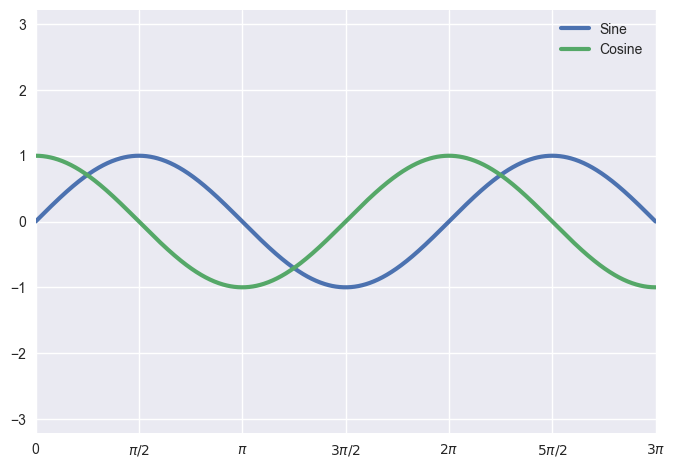

In [60]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig;

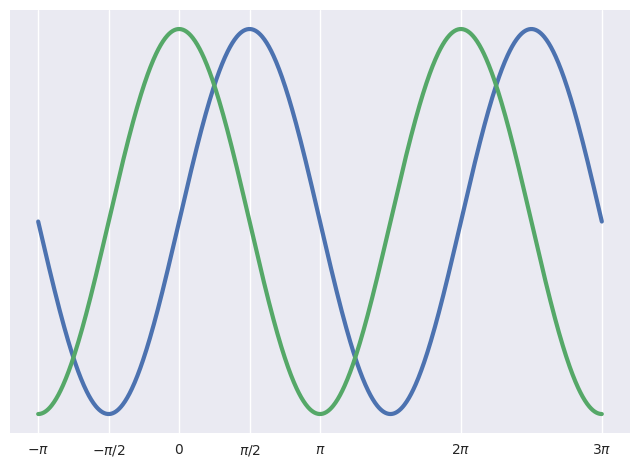

In [61]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(-np.pi, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi, 2*np.pi, 3*np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$', r'$2\pi$', r'$3\pi$'])
# eliminar marcas y etiquetas del eje y
ax.yaxis.set_major_locator(plt.NullLocator())

<a id="spines"></a>
## Líneas del eje (*spines*)

Cada parcela puede tener cuatro líneas de eje: "arriba", "abajo", "izquierda" y "derecha". Por defecto, están configurados de modo que encuadran la trama, pero se pueden posicionar y configurar individualmente.

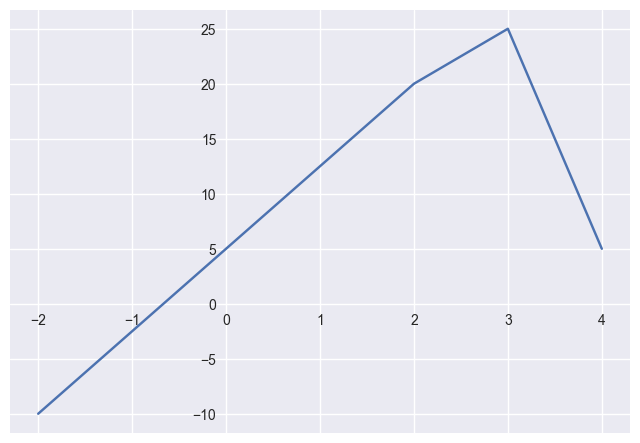

In [62]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

<a id="tridimensionales"></a>
## Gráficos Tridimensionales 

Matplotlib se diseñó inicialmente teniendo en cuenta solo los gráficos bidimensionales. En la versión 1.0, se construyeron algunas utilidades de trazado tridimensional pero con una solución limitada. Actualmente para la visualización de datos tridimensionales se importa el kit de herramientas `mplot3d`, incluido con la instalación principal de Matplotlib. Una vez que se importa este submódulo, podemos crear ejes tridimensionales pasando la palabra clave `projection = '3d'` a cualquiera de las rutinas de creación de ejes normales.

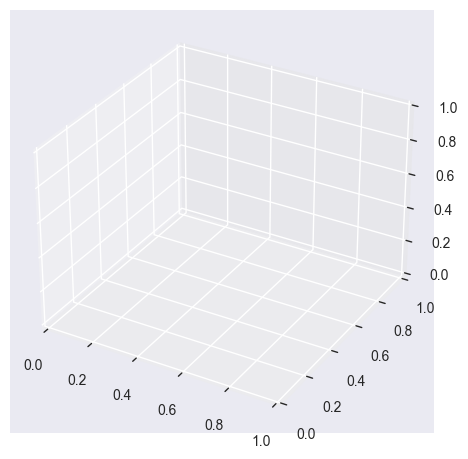

In [63]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

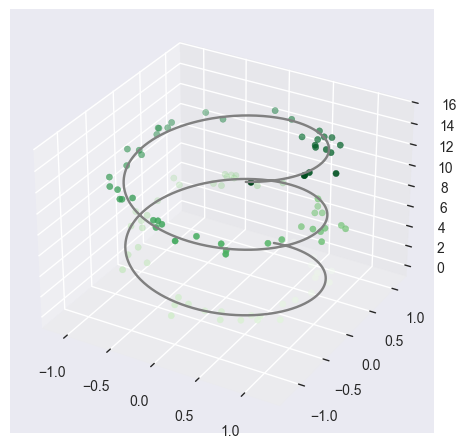

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

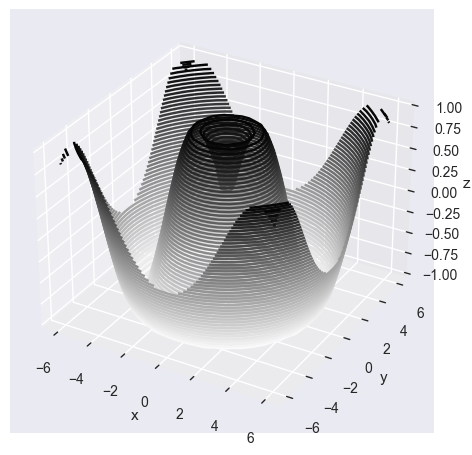

In [65]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y) 
Z=f(X,Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

A veces, el ángulo de visión predeterminado no es óptimo, en cuyo caso podemos usar el método `view_init` para establecer la elevación y los ángulos acimutales.

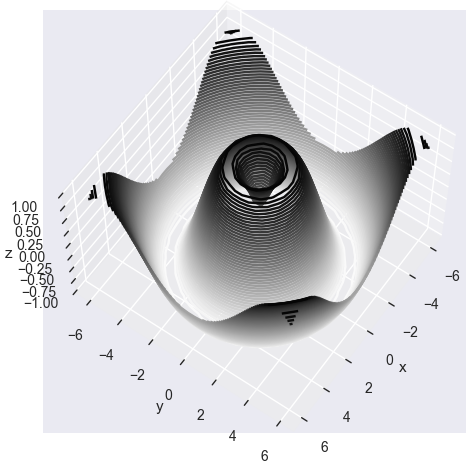

In [66]:
ax.view_init(60, 35)
fig

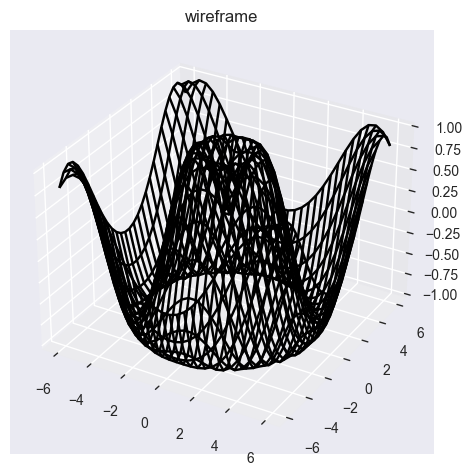

In [67]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

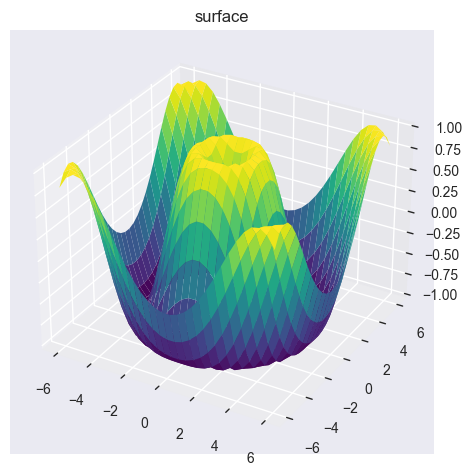

In [68]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

<a id="seaborn"></a>
# Seaborn
`Seaborn` es una biblioteca de visualización de datos de Python basada en `matplotlib`. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.Introducimos algunos de los gráficos disponibles.

<a id="tira"></a>
## Gráficos de tira

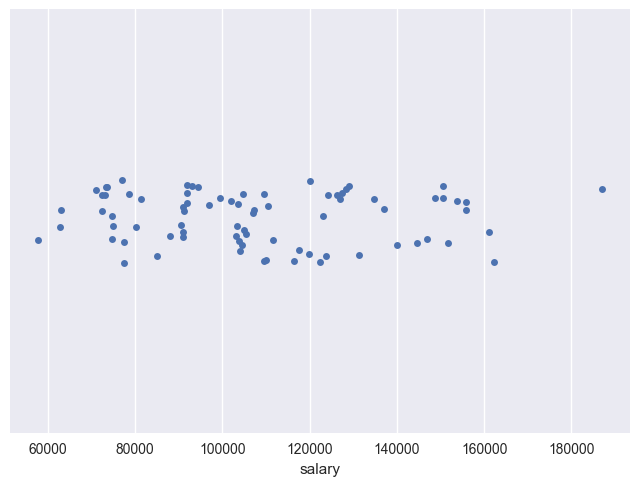

In [69]:
import seaborn as sns
sns.stripplot( x = dataset['salary']);

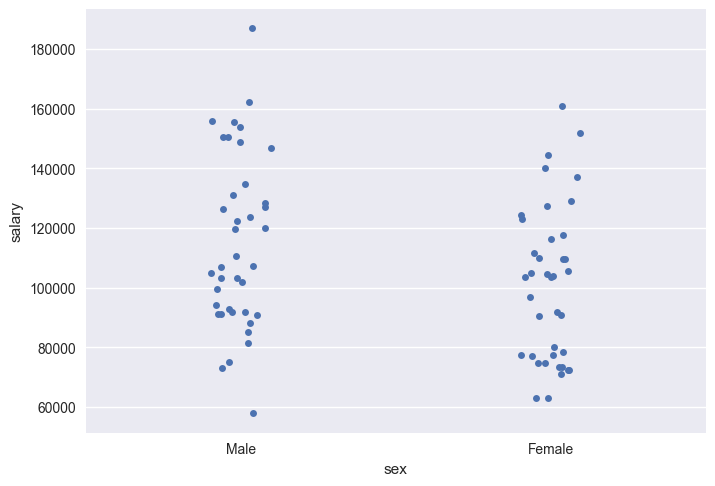

In [70]:
sns.stripplot( x = dataset['sex'], y = dataset['salary'], data=dataset);

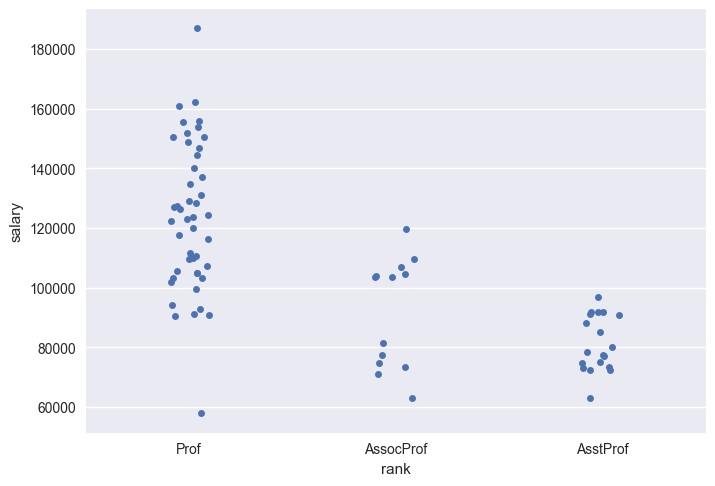

In [71]:
sns.stripplot( x = dataset['rank'], y = dataset['salary'], data=dataset, jitter=True);

<Axes: xlabel='sex', ylabel='salary'>

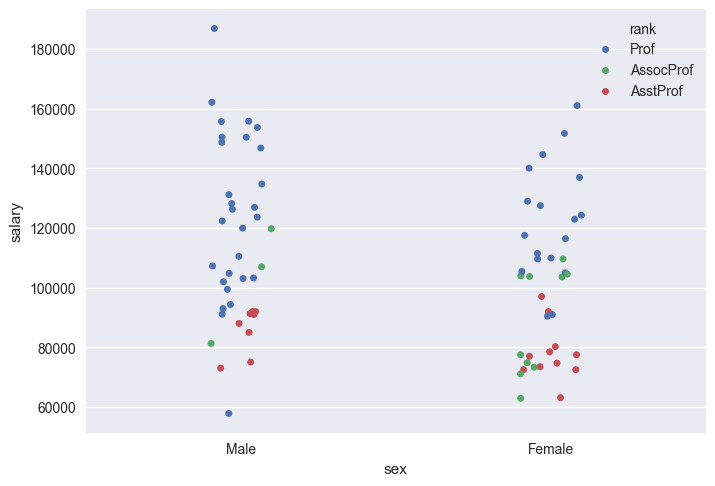

In [72]:
sns.stripplot( x ='sex', y = 'salary', hue ='rank', data=dataset, jitter=True )

<a id="caja"></a>
## Gráficos de caja
Un diagrama de caja es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Pueden informar sobre los valores atípicos. Permiten saber si los datos son simétricos, cómo se agrupan sus datos y cómo están sesgados.

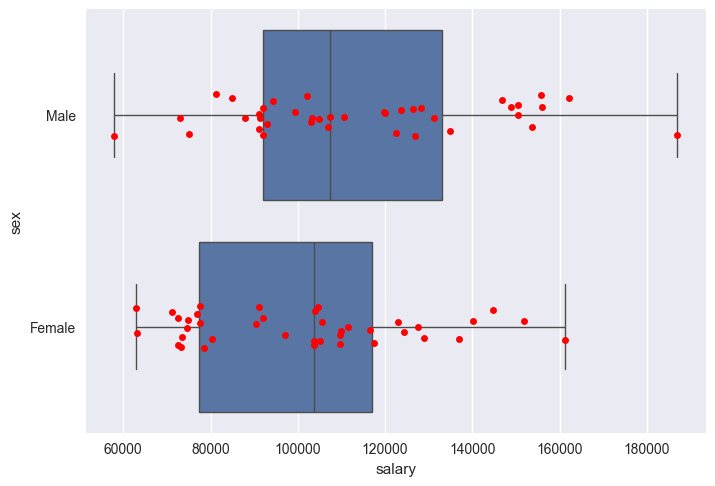

In [73]:
sns.boxplot(x = 'salary', y ='sex', data=dataset, whis=np.inf )
sns.stripplot(x = 'salary', y ='sex', data=dataset, jitter=True, color='red');

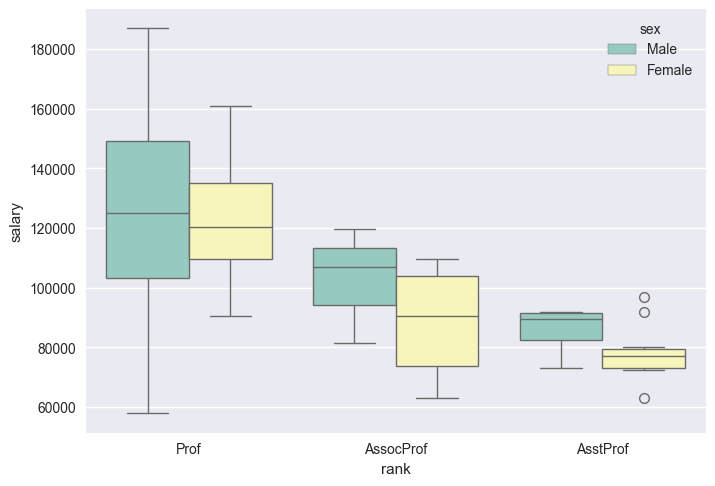

In [74]:
sns.boxplot(x = 'rank', y = 'salary', hue='sex', data=dataset, palette='Set3');

<a id="enjambre"></a>
## Gráficos en enjambre
Se utilizan para visualizar diferentes categorías, da una imagen clara de la distribución de una variable frente a variables.

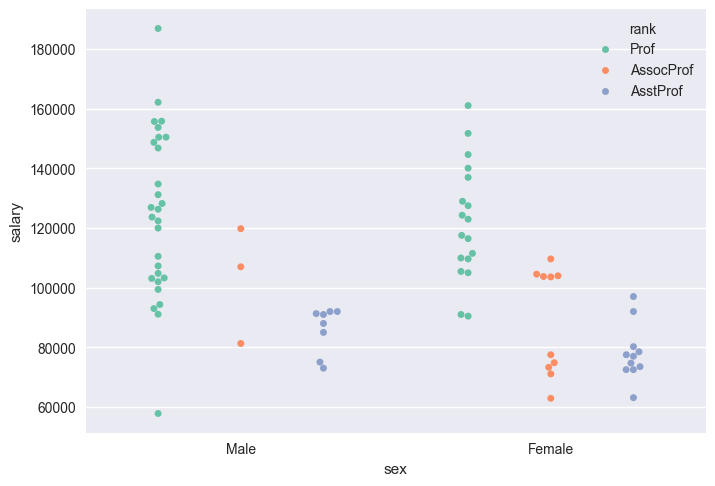

In [75]:
sns.swarmplot( x ='sex', y= 'salary', hue='rank', data=dataset, palette="Set2", dodge=True);

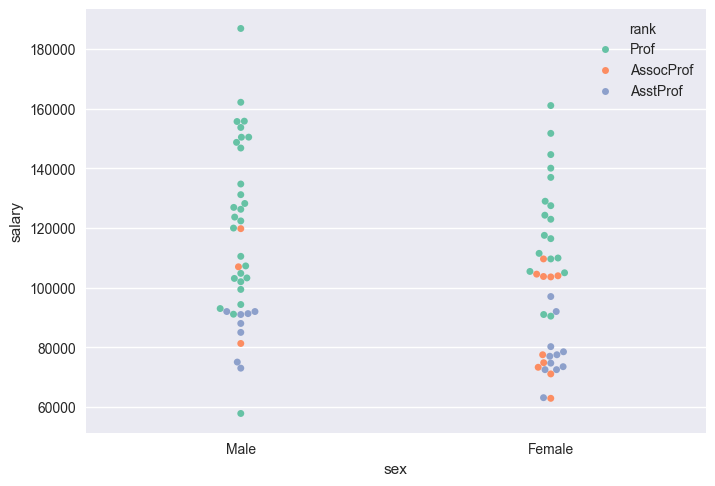

In [76]:
sns.swarmplot( x ='sex', y= 'salary', hue='rank', data=dataset, palette="Set2", dodge=False);

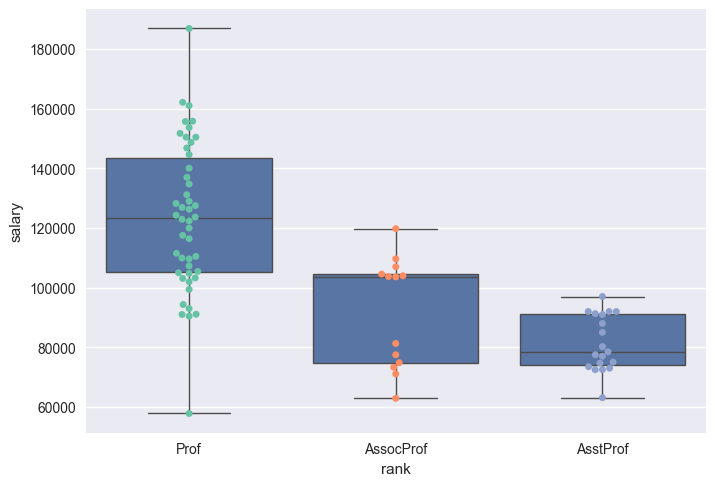

In [79]:
sns.boxplot(x = 'rank', y = 'salary', data=dataset)

# Graficar usando 'rank' como hue y desactivar la leyenda
sns.swarmplot(x='rank', y='salary', data=dataset, palette="Set2", hue='rank', legend=False)
plt.show()

<a id="conjuntas"></a>
## Gráficas conjuntas
Un gráfico conjunto combina más de un gráfico para visualizar los patrones seleccionados.

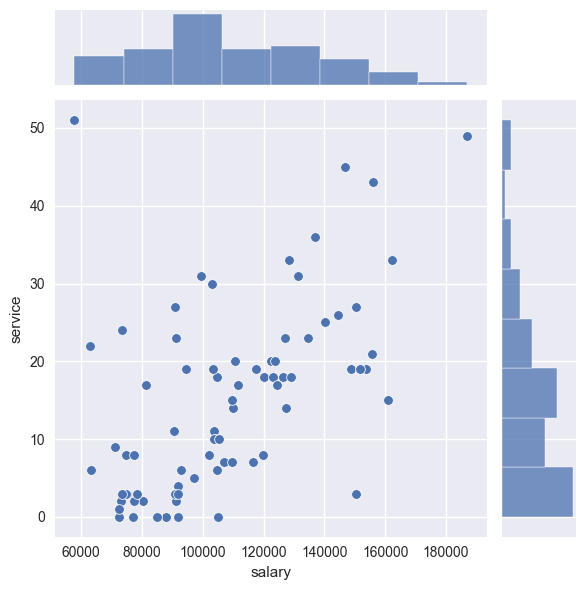

In [80]:
sns.jointplot(x = 'salary', y = 'service', data=dataset);

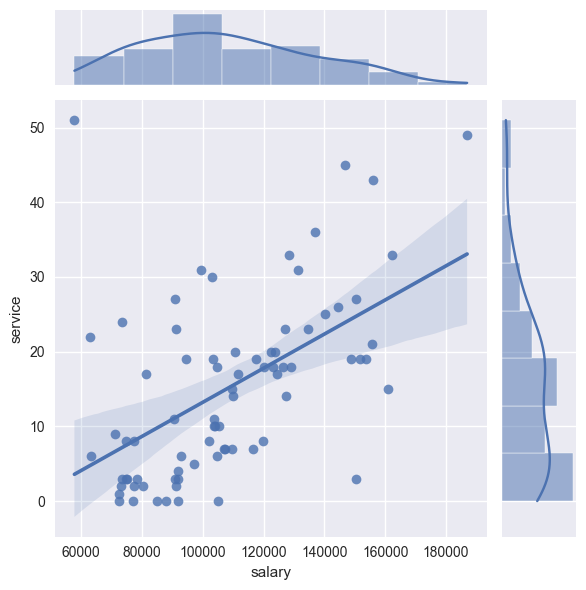

In [84]:
# sns.jointplot('salary', 'service', data=dataset, kind='reg');
# Ajusta el gráfico usando x y y explícitamente
sns.jointplot(x='salary', y='service', data=dataset, kind='reg')
plt.show()

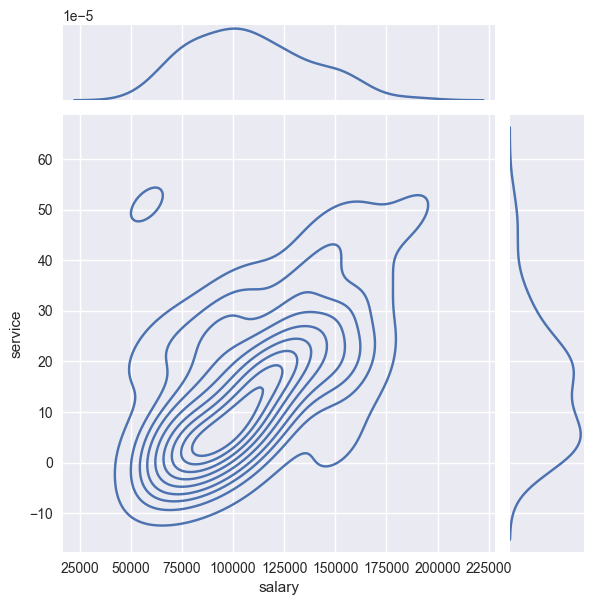

In [85]:
# Ajusta el gráfico usando x y y explícitamente
sns.jointplot(x='salary', y='service', data=dataset, kind='kde')
plt.show()

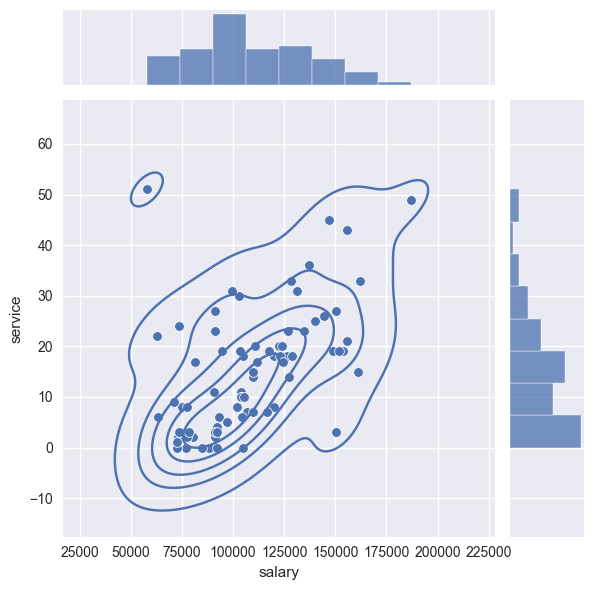

In [86]:
# Ajusta el gráfico usando x y y explícitamente
sns.jointplot(x='salary', y='service', data=dataset).plot_joint(sns.kdeplot, n_levels=6);
plt.show()

---